You can use this script in multiple ways. You can (1) run it directly with Colab or (2) download it and run it somewhere that you have Python and Jupyter notebook software.

(1) To use Colab, go back to https://colab.research.google.com/github/cmbitz/Cloud-Droplet-Exercise/blob/main/DropletRadiusExercise.ipynb and it should start Colab for you. You do not have to Sign In. But if you do, you can save the script to your Google Drive and run it anytime from there. You may have to allow Colab access to your computer or google account. Once Colab starts, you can run this script in two different ways. (a) From the Runtime tab you can choose various options or (b) click in an individual cell that you want to run and then click on the little triangle that appears.

(2) From a Jupyter notebook: You can run this script in two different ways from Jupyter. (a) From the Kernel tab choose 'Restart & Run All' or (b) by clicking the Run button to run one cell at a time.

I normally run notebooks one cell at a time so I can watch what happens.

This script is populated with figures and output to start. You should rerun it anyway one cell at a time until you remake the first figure. Pause and look at that figure and rerun that cell a few times to remake it multiple times without chaning the parameters. Notice how much it varies. 

Run the remaining cells one at a time, pausing to see what happens. Try varying things. Look at the homework questions and work through them. If at anytime you suspect the script is confused, go to the Kernel tab and choose 'Restart & Run All'.

BEWARE, if you run Colab without signing in, Colab does not allow you to save your work! This isn't a problem because you don't need to save the script. You can capture a figure by taking a screenshot of a figure or drag-and-drop it somewhere on your computer. If you feel courageous, you can acquire this script in one of the two ways I described at the top of these instructions. Because this is not necessary, I won't provide any further instructions on how to do it.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as sps

The droplet size distribution in nature is thought to resemble a gamma distribution, which is 
$$n(r) = {N_d \over R_m^\gamma} {1 \over \Gamma(\gamma)} r^{\gamma-1} \exp(-r/R_m)$$
where $r$ is the droplet radius, $N_d$ is the total number of droplets, $R_m$ is a reference radius and $\gamma$ is the shape parameter. Here $r$ and $R_m$ are in microns (denoted $\mu m$). You don't need to be memorize any of the equations in these instructions. They are only FYI.

For any distribution $n(r)$, the effective radius is 
$$ r_e = { \int_0^\infty \pi r^3 n(r) dr \over \int_0^\infty \pi r^2 n(r) dr }$$

and the mean is
$$ \bar r = { \int_0^\infty r n(r) dr \over \int_0^\infty n(r) dr }$$

In [2]:
def sample_and_theory(gammaparam, Rm, Nd):
    '''
    Draw Nd random samples from a gamma distribution, compute and plot the histogram of the draws.
    Plot the histogram with a theoretical gamma distribution curve.
    '''
    samples = np.random.gamma(gammaparam, Rm, Nd)           # draws Nd random samples from a gamma distribution
                                                            # think of each sample as one droplet
    count, bins, ignore = plt.hist(samples, 50)             # compute a histogram and plot it
    binwidth=bins[2]-bins[1]
    binmp=(bins[0:-1]+bins[1:])/2.                          # find bin midpoints from bin edges

    # compute a theoretical gamma distribution
    theoretical = binmp**(gammaparam-1)*(np.exp(-binmp/Rm) /  
                         (sps.gamma(gammaparam)*Rm**gammaparam))
    theoretical=binwidth*Nd*theoretical                     # scale by the number of droplets we sampled
    plt.plot(binmp, theoretical, linewidth=2, color='r')    # plot the theoretical distribution 
    
    plt.xlabel('Radius r ($\mu$ m)')
    plt.ylabel('Draws from a gamma distribution')
    print('This histogram shows the distribution of our cloud droplet data for ',Nd,' droplets') 
    print('The height of the bar is the count and radius has been broken into bins')
    print('A theoretical gamma distribution is shown.\n')

    retheo = Rm*(gammaparam+2)                              # theoretical estimate for effective radius
    eff_radius, mean_radius=various_radii(binmp,count)      # estimates from random samples

    print('\nRun the cell again (click in the cell and pressing the Run button)') 
    print('to see how the statistics from Nd droplets can vary.\n')

    return binmp, theoretical, retheo

def various_radii(binmp,count):
    '''
    Compute the effective radius and the mean radius and print them
    '''
    numerator=np.sum(np.pi*binmp**3*count)
    denominator=np.sum(np.pi*binmp**2*count)
    eff_radius=numerator/denominator
    
    numerator=np.sum(binmp*count)
    denominator=np.sum(count)
    mean_radius=numerator/denominator
    
    print('The effective radius is ',np.round(eff_radius),'microns')
    print('The mean radius is ',np.round(mean_radius),'microns')
    return eff_radius, mean_radius

In [3]:
Nd = 200  # collect this many cloud droplets from the cloud

This histogram shows the distribution of our cloud droplet data for  200  droplets
The height of the bar is the count and radius has been broken into bins
A theoretical gamma distribution is shown.

The effective radius is  14.0 microns
The mean radius is  11.0 microns

Run the cell again (click in the cell and pressing the Run button)
to see how the statistics from Nd droplets can vary.



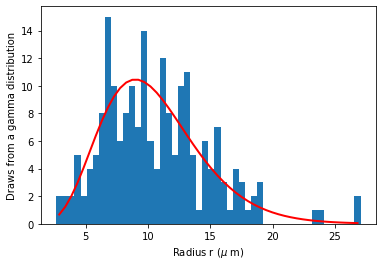

In [4]:
gammaparam1 = 7.
Rm1 = 1.5  
binmp1, theoretical1, retheo1 = sample_and_theory(gammaparam1, Rm1, Nd)

This histogram shows the distribution of our cloud droplet data for  200  droplets
The height of the bar is the count and radius has been broken into bins
A theoretical gamma distribution is shown.

The effective radius is  24.0 microns
The mean radius is  19.0 microns

Run the cell again (click in the cell and pressing the Run button)
to see how the statistics from Nd droplets can vary.



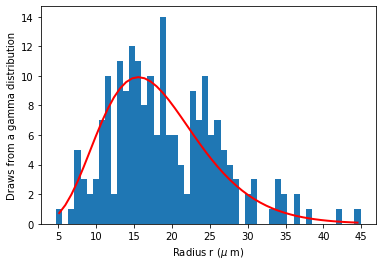

In [5]:
gammaparam2 = 7.
Rm2 = 2.6
binmp2, theoretical2, retheo2 = sample_and_theory(gammaparam2, Rm2, Nd)

Next plot the two theoretical curves together to see how they compare

Text(0, 0.5, 'Gamma distributions')

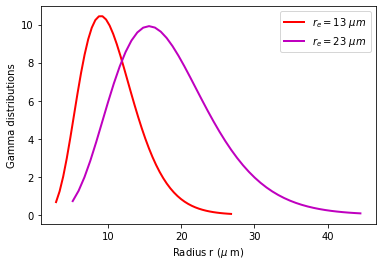

In [6]:
plt.plot(binmp1, theoretical1, linewidth=2, color='r',label='$r_e={:2}\ \mu m$'.format(int(retheo1)))
plt.plot(binmp2, theoretical2, linewidth=2, color='m',label='$r_e={:2}\ \mu m$'.format(int(retheo2)))
plt.legend()
plt.xlabel('Radius r ($\mu$ m)')
plt.ylabel('Gamma distributions')

## Make up your own distribution by editing the counts in the next cell. 
I've given you a simple distribution to start out that you must change in some way that you'd like to explore.

Also feel free to add numbers to binmp to resolve the distribution to your liking.

When ready run the cell with the Run button.

The effective radius is  13.0 microns
The mean radius is  10.0 microns


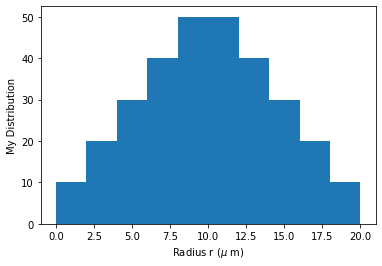

In [7]:
binmp = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19] 
counts = [10, 20, 30, 40, 50, 50, 40, 30, 20, 10]  # CHANGE HERE

if len(binmp) !=len(counts):
    print('binmp and counts must be the same length')
else:
    binmp=np.array(binmp) # convert to numpy array so we can do fancy math 
    counts=np.array(counts)
    binwidth=binmp[1]-binmp[0]
    
    plt.bar(binmp,counts,binwidth)
    plt.xlabel('Radius r ($\mu$ m)')
    plt.ylabel('My Distribution')

    various_radii(binmp,counts)